<img src="logo.png"/>

<h1 align=center><font size = 5> REINFORCEMENT LEARNING: FROM BASIC TO ADVANCED</font></h1>

##  Table of contents
<div class="alert alert-block alert-info" style="margin-top: 20px">
<br>
- <p><a href="#ref1">Goals?</a></p>
- <p><a href="#ref2">Requirements?</a></p>
- <p><a href="#ref3">What is Reinforcement Learning?</a></p>
- <p><a href="#ref4">Reinforcement Learning Approaches?</a></p>
- <p><a href="#ref4">Deep Reinforcement Learning?</a></p>
- <p><a href="#ref6">Research Areas?</a></p>
- <p><a href="#ref6">Conclusion?</a></p>
- <p><a href="#ref7">References?</a></p>
<p></p>
</div>
<br>

<a id="ref1"></a>
# Goals?
You will have learned:
- What Reinforcement Learning is and how it works
- Understanding some ideas and algorithms from basic to advanced
- The challenges in Reinforcement Learning.
- The lecture is designed to non-RL person.

<a id="ref2"></a>
# Requirement?
You should already know:
- Beginner level Python
- Linear Algebra

- Tensorflow (advanced part only)
- Deep learning ((advanced part only))

Required packages

In [6]:
import numpy as np
import gym
import matplotlib.pyplot as plt
from collections import deque
import random

<a id="ref3"></a>
# What is Reinforcement Learning?

### Definition

Reinforcement learning (RL) is an area of machine learning concerned with how the agent take actions in an environment to maximize discounted cumulative reward.

<img src="images/rl.gif"/>

### The process of RL involves steps:
1. The agent observes a **state** from the **environment**
2. The agent select an **action** using a **policy**
3. The agent executes the **action**
4. The agent observes next **state** from the **environment**
5. The agent receives a **reward** from the **environment**
6. Learning the **policy** based on the experiences
7. Iterate until an *optimal* **policy** is found

### Example environment: CartPole Balancing

Let's use a simulation of a cartpole problem. The goal is to demonstrate, how you can use RL techniques to develop an efficient and safe approach for tackling this problem.

<img src="images/cartpole.gif"/>

A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The goal of cartpole problem is to balance the pole. Here are a few things that we must to take care of:

- The problem fails if the pole is more than 12 degrees from vertical.
- The problem fails if the cart moves more than 2.4 units from the center.

Now, we import the cartpole environment from [Gym OpenAI](https://gym.openai.com)

In [7]:
env = gym.make('CartPole-v1')

[2019-01-15 10:26:55,081] Making new env: CartPole-v1


There are different aspects that need to be considered here while modeling an RL solution to this problem: rewards, states, and actions.

##### Rewards

Since the agent is reward-motivated and is going to learn how to balance the pole by trial experiences in the environment, we need to decide the rewards and/or penalties and their magnitude accordingly. 

In cartpole problem, a reward of +1 is provided for every timestep that the pole remains upright.

##### State Space

The State Space is the set of all possible situations the cart-pole system could inhabit. The state should contain useful information the agent needs to make the right action.

In cartpole problem, the state has 4 dimensions (4-dimensional states):
- Cart Position (min: -4.8, max: 4.8)
- Cart Velocity (min: -inf, max: inf)
- Pole Angle (min: -24 degrees, max: 24 degrees)
- Pole Velocity (min: -inf, max: inf)

Print the state space:

In [8]:
print(env.observation_space)

Box(4,)


More details:

In [9]:
print(env.observation_space.high)
print(env.observation_space.low)

[  4.80000000e+00   3.40282347e+38   4.18879020e-01   3.40282347e+38]
[ -4.80000000e+00  -3.40282347e+38  -4.18879020e-01  -3.40282347e+38]


##### Action Space

The set of all the actions that our agent can take in a given state.

In cartpole problem, the agent has two actions:
- 0: Push cart to the left
- 1: Push cart to the right

Print the action space:

In [10]:
print(env.action_space)

Discrete(2)


##### Policy

A policy of a RL algorithm is denoted by $\pi$, which is the probability of taking an action $a$ given a state $s$: 
\begin{align}
\pi = {\cal P}(a|s),
\end{align}

The goal of an RL algorithm is to find an optimal policy $\pi^*$ in order to maximize the expected discounted reward as follows:
\begin{align}
J(\pi ) = \mathbb{E}\bigg[\sum\limits_{t = 0}^\infty {{\gamma ^t}r({s_t},{a_t})}\bigg].
\end{align}

$\gamma$ is the discount factor determines how much importance we want to give to future rewards. A high value for the discount factor (close to 1) captures the long-term effective award, whereas, a discount factor of 0 makes our agent consider only immediate reward, hence making it greedy.

### Solving the environment without Reinforcement Learning

Let's see what would happen if we try to use a heuristic approach to solving the problem without RL.

##### Random search

We create a class called **LinearAgent** which is parameterized by 4 parameters $\theta_1$, $\theta_2$, $\theta_3$, $\theta_4$ (between -1 and 1). The agent takes action based on the rules as follows:
- Push left if $\theta_1 * state[0] + \theta_2 * state[1] + \theta_3 * state[2] + \theta_4 * state[3] < 0$
- Otherwise: push right

In [13]:
class LinearAgent:

    def __init__(self):
        self.thetas = np.random.rand(4) * 2 - 1

    def policy(self, state):
        return 0 if np.matmul(self.thetas, state) < 0 else 1

Function **run_episode** to run the cartpole using **Agent**

In [14]:
def run_episode(env, agent):
    states = []
    actions = []
    rewards = []

    state = env.reset()
    for _ in range(500):
        action = agent.policy(state)
        states.append(state)
        actions.append(action)

        state, reward, done, info = env.step(action)
        rewards.append(reward)

        if done:
            break

    return np.array(states), np.array(actions), np.array(rewards)

**Random search** algorithm randomly find parameters that maximize the total reward

In [15]:
def random_search():
    env = gym.make('CartPole-v1')
    np.random.seed(123)
    env.seed(123)
    
    best_params = None
    best_reward = 0
    agent = LinearAgent()
    ran_avg_rewards = []
    scores = deque(maxlen=100)
   
    for runs in range(10000):
        agent.thetas = np.random.rand(4) * 2 - 1
        _,_,rewards = run_episode(env, agent)
        total_reward = np.sum(rewards)
        if total_reward > best_reward:
            best_reward = total_reward
            best_params = np.copy(agent.thetas)

        # evaluate the agent
        agent.thetas = best_params
        _,_,rewards = run_episode(env, agent)
        scores.append(np.sum(rewards))
        ran_avg_rewards.append(np.mean(scores))
        
        if (runs%250==0):
            print("Episode:" + str(runs) +" | Avg Reward: " + str(ran_avg_rewards[runs]))
    
    return ran_avg_rewards

Now, run the random agent and show the performance:

[2019-01-15 10:29:52,698] Making new env: CartPole-v1


Episode:0 | Avg Reward: 153.0
Episode:250 | Avg Reward: 346.32
Episode:500 | Avg Reward: 326.48
Episode:750 | Avg Reward: 344.34
Episode:1000 | Avg Reward: 346.67
Episode:1250 | Avg Reward: 361.01
Episode:1500 | Avg Reward: 368.23
Episode:1750 | Avg Reward: 321.24
Episode:2000 | Avg Reward: 313.31
Episode:2250 | Avg Reward: 359.46
Episode:2500 | Avg Reward: 353.48
Episode:2750 | Avg Reward: 352.6
Episode:3000 | Avg Reward: 354.48
Episode:3250 | Avg Reward: 346.3
Episode:3500 | Avg Reward: 319.64
Episode:3750 | Avg Reward: 325.87
Episode:4000 | Avg Reward: 341.27
Episode:4250 | Avg Reward: 333.26
Episode:4500 | Avg Reward: 343.05
Episode:4750 | Avg Reward: 340.77
Episode:5000 | Avg Reward: 310.83
Episode:5250 | Avg Reward: 362.95
Episode:5500 | Avg Reward: 335.77
Episode:5750 | Avg Reward: 321.33
Episode:6000 | Avg Reward: 363.86
Episode:6250 | Avg Reward: 357.99
Episode:6500 | Avg Reward: 338.28
Episode:6750 | Avg Reward: 316.12
Episode:7000 | Avg Reward: 335.38
Episode:7250 | Avg Rewa

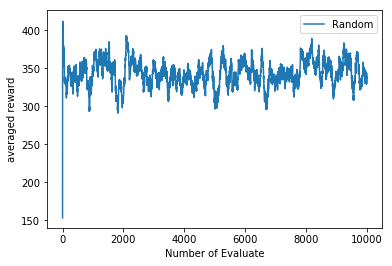

In [16]:
ran_avg_rewards = random_search()

plt.ylabel('averaged reward')
plt.xlabel('Number of Evaluate')
plt.plot(ran_avg_rewards)
plt.legend(['Random'])
plt.show()

Balancing around 7 seconds

##### Heuristic 

Now, I use a heuristic as follow:

- The agent pushes cart to the **left** if angle and angular velocity of the pole are less than 0
- The agent pushes cart to the **right** if angle and angular velocity of the pole are greater than 0
- Otherwise, the agent execute a random action.

In [17]:
class HeuristicAgent:

    def __init__(self):
        pass

    def policy(self, state):
        # Heuristic approach
        if (state[2] < 0 and state[3] < 0):
            return 0
        elif (state[2] > 0 and state[3] > 0):
            return 1
        else:
            return np.random.randint(0, 2)

Run the heuristic agent and show the performance:

[2019-01-15 10:30:57,636] Making new env: CartPole-v1


Episode:0 | Avg Reward: 500.0
Episode:250 | Avg Reward: 439.67
Episode:500 | Avg Reward: 457.2
Episode:750 | Avg Reward: 452.48
Episode:1000 | Avg Reward: 443.73
Episode:1250 | Avg Reward: 433.83
Episode:1500 | Avg Reward: 454.64
Episode:1750 | Avg Reward: 447.74
Episode:2000 | Avg Reward: 451.51
Episode:2250 | Avg Reward: 444.79
Episode:2500 | Avg Reward: 435.61
Episode:2750 | Avg Reward: 450.72
Episode:3000 | Avg Reward: 446.0
Episode:3250 | Avg Reward: 456.13
Episode:3500 | Avg Reward: 444.55
Episode:3750 | Avg Reward: 445.93
Episode:4000 | Avg Reward: 445.64
Episode:4250 | Avg Reward: 437.7
Episode:4500 | Avg Reward: 441.39
Episode:4750 | Avg Reward: 456.74
Episode:5000 | Avg Reward: 431.67
Episode:5250 | Avg Reward: 452.25
Episode:5500 | Avg Reward: 448.11
Episode:5750 | Avg Reward: 442.46
Episode:6000 | Avg Reward: 447.12
Episode:6250 | Avg Reward: 439.27
Episode:6500 | Avg Reward: 446.74
Episode:6750 | Avg Reward: 448.43
Episode:7000 | Avg Reward: 445.79
Episode:7250 | Avg Rewar

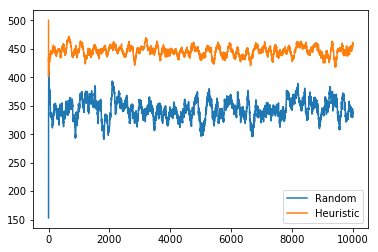

In [18]:
def heuristic():
    env = gym.make('CartPole-v1')
    np.random.seed(123)
    env.seed(123)
    
    heu_avg_rewards = []
    scores = deque(maxlen=100)
    agent = HeuristicAgent()
    
    for runs in range(10000):
        _,_,rewards = run_episode(env, agent)
        scores.append(np.sum(rewards))
        heu_avg_rewards.append(np.mean(scores))
        
        if (runs%250==0):
            print("Episode:" + str(runs) +" | Avg Reward: " + str(heu_avg_rewards[runs]))
        
    return heu_avg_rewards

# plot
heu_avg_rewards = heuristic()
plt.plot(range(10000),ran_avg_rewards)
plt.plot(range(10000),heu_avg_rewards)
plt.legend(["Random", 'Heuristic'])
plt.show()

The cart-pole balance in 9s but the agent does not learn anything.

So, now let's use some algorithms to control the cart-pole

# RL Approaches?

I prefer to categorize the RL algorithms into three approaches: value-based approach, policy-based approach and actor-critic approach. Other ways to classification: model-free approach vs model-based approach, on-policy vs off-policy

<img src="images/taxonomy.png"/>

### Value-based approach

A typical value-based approach tries to obtain an optimal policy by finding optimal value functions (${\cal V}$ values) or action value function (${\cal Q}$ values). 

##### Value function ${\cal V}(s_t)$

The value of state $s$ is defined to be the expected discounted reward which the agent can get if the agent starts in state $s$. Formally, this can be written as:

\begin{align}
{\cal V} (s_t) = \mathbb{E}\bigg[\sum\limits_{t' = t}^T {{\gamma ^{t'-t}}r({s_{t'}},{a_{t'}})}\bigg].
\end{align}

<img src="images/v_value.png"/>

Assume we have a cheat sheet scoring every state: 

\begin{align}
{\cal V}(s_t).
\end{align}

We can simply look at the cheat sheet and find what is the next most rewarding state and take the corresponding action.

##### Action-value function ${\cal Q}(s_t, a_t)$

Action-value function ${\cal Q}$ measures the expected discounted rewards of taking an action $a_t$ at state $s_t$

\begin{align}
{\cal Q} (s_t,a_t) = \mathbb{E}\bigg[\sum\limits_{t' = t}^T {{\gamma ^{t'-t}}r({s_{t'}},{a_{t'}})}\bigg].
\end{align}

<img src="images/q_value.png"/>

##### Methods to estimate ${\cal V}$ and ${\cal Q}$

###### Dynamic Programming (DP)

Dynamic Programming is a very general solution method for problems which have two properties:
1. Optimal substructure
- Principle of optimality applies
- Optimal solution can be decomposed into subproblems
2. Overlapping subproblems
- Subproblems recur many times
- Solutions can be cached and reused

Dynamic programming assumes full knowledge of the MDP (E.g. we know everything about the environment).

I ignore the DP-based algorithms because it is difficult to solve *unknown* MDP

###### Monte-Carlo (MC)

- MC methods estimate ${\cal Q}$ directly from episodes of experience
- MC is model-free: no knowledge of MDP transitions / rewards
- MC learns from complete episodes.
- Can only apply MC to episodic MDPs (All episodes must be terminated)

Now, we try to use MC method to control cartpole problem. First, we need to build a Q-table. 

- The Q-table is a matrix where we have a row for every state (discrete state) and a column for every action (2 action). It's first initialized to 0, and then values are updated after training.

In cartpole, the state space is a continous state space. Thus, we need to discretize the state space to discrete state. The discrete intervals are defined as follows:

- Cart Position ($x$) is devided into 1 part: [-4.8:4.8]
- Cart Velocity ($\dot{x}$) is devided into 8 parts: [-3:-2.25], [-2.25:-1.5], [-1.5:-0.75], [-0.75:0], [0:0.75], [0.75:1.5], [1.5:2.25], [2.25:3]
- Pole Angle ($\theta$) is devided into 8 parts (in degrees): [-24:-18], [-18:-12], [-12:-6], [-6:0], [0:6], [6:12], [12:18], [18:24]
- Pole Velocity ($\dot{\theta}$) is devided into 8 parts: [-2:-1.5], [-1.5:-1], [-1:-0.5], [-0.5:0], [0:0.5], [0.5:1], [1:1.5], [1.5:2]

Totally, we have 512 states. The form of Q-table as follows:

<img src="images/q_table.png"/>

We need some functions:
- **discretize_val**: converts a raw state to particular interval.
- **obs_to_state**: converts a raw state to discrete state index (from 0 to 511)
- **get_discounted_rewards**: return the discounted reward of each state in a episode

In [19]:
def discretize_val(val, min_val, max_val, num_states):
    state = int(num_states * (val - min_val) / (max_val - min_val))
    if state >= num_states:
        state = num_states - 1
    if state < 0:
        state = 0
    return state

def get_state_idx(state):
    num_interval = [1, 8, 8, 8]
    lower_bounds = [-4.8, -3, -0.418, -2]
    upper_bounds = [4.8, 3, 0.418, 2]

    state_idx = []
    for ob, lower, upper, num in zip(state, lower_bounds, upper_bounds, num_interval):
        state_idx.append(discretize_val(ob, lower, upper, num))

    return np.ravel_multi_index(state_idx, num_interval)

def get_discounted_rewards(rewards, gamma):
    future_discounted_reward = 0
    discounted_rewards = np.empty_like(rewards, dtype=np.float64)
    for i in range(rewards.shape[0] - 1, -1, -1):
        discounted_rewards[i] = rewards[i] + gamma * future_discounted_reward
        future_discounted_reward = discounted_rewards[i]

    return discounted_rewards

Create **MCAgent** class with some methods:
- **init**: define some hyperparameters, create Q-table (512x2), create a table to count the number of visited states
- **policy**: using Q table to take action. Here is a greedy-epsilon policy

\begin{equation} 
\pi(a|s) = \begin{cases}
argmax{Q(s,a)} & random > \epsilon\\
\textit{a random action} & random < \epsilon
\end{cases}
\end{equation}

- **update**: using sampled episode to update the Q action-values in Q-table. Particularly, we find the total discounted reward $G_t$ (total discounted rewards from $s_t$ to the end). We update the action value function by adding a small portion of the difference between new estimate $G_t$ and the current action value $Q(s_t, a_t)$ back to itself. This approach creates a running mean from a stream of estimates. With many more episodes, $Q(s_t, a_t)$ will converge to the true value.

\begin{equation} 
Q(s_t, a_t)=Q(s_t,a_t)+\alpha(G_t−Q(s_t,a_t))
\end{equation}

<img src="images/MC.png"/>

In the code below:

\begin{equation} 
Q(s_t, a_t) = Q(s_t, a_t) + \frac{1}{\textit{number of visited state $s_t$ and take action $a_t$}}(R_t - Q(s_t, a_t))
\end{equation}

In [20]:
class MCAgent(object):
    def __init__(self):
        self.gamma = 1.0
        self.eps = 0.1
        self.eps_decay = 0.99999

        self.Q = np.zeros((512, 2))
        self.Q_num = np.zeros((512, 2))

    def policy(self, state):
        state_idx = get_state_idx(state)

        random = np.random.rand(1)[0]
        if random > self.eps:
            action_values = self.Q[state_idx, :]
            return np.argmax(action_values)
        else:
            return np.random.randint(0, 2)

    def update(self, states, actions, rewards):
        discounted_rewards = get_discounted_rewards(np.array(rewards), self.gamma)
        for state, action, disc_rew in zip(states, actions, discounted_rewards):
            state_idx = get_state_idx(state)

            # incremental averaging
            self.Q_num[state_idx, action] += 1
            self.Q[state_idx, action] += (disc_rew - self.Q[state_idx, action]) / self.Q_num[state_idx, action]

        self.eps *= self.eps_decay

Now, run the MC algorithm and report the performance

[2019-01-15 10:46:26,656] Making new env: CartPole-v1


Episode:0 | Avg Reward: 10.0
Episode:250 | Avg Reward: 109.3
Episode:500 | Avg Reward: 113.1
Episode:750 | Avg Reward: 122.84
Episode:1000 | Avg Reward: 130.69
Episode:1250 | Avg Reward: 117.28
Episode:1500 | Avg Reward: 123.18
Episode:1750 | Avg Reward: 125.23
Episode:2000 | Avg Reward: 124.97
Episode:2250 | Avg Reward: 130.03
Episode:2500 | Avg Reward: 122.72
Episode:2750 | Avg Reward: 122.97
Episode:3000 | Avg Reward: 122.71
Episode:3250 | Avg Reward: 124.83
Episode:3500 | Avg Reward: 124.32
Episode:3750 | Avg Reward: 122.73
Episode:4000 | Avg Reward: 123.4
Episode:4250 | Avg Reward: 124.54
Episode:4500 | Avg Reward: 125.87
Episode:4750 | Avg Reward: 124.11
Episode:5000 | Avg Reward: 124.07
Episode:5250 | Avg Reward: 124.42
Episode:5500 | Avg Reward: 123.24
Episode:5750 | Avg Reward: 126.18
Episode:6000 | Avg Reward: 123.08
Episode:6250 | Avg Reward: 119.45
Episode:6500 | Avg Reward: 127.88
Episode:6750 | Avg Reward: 122.84
Episode:7000 | Avg Reward: 135.12
Episode:7250 | Avg Reward

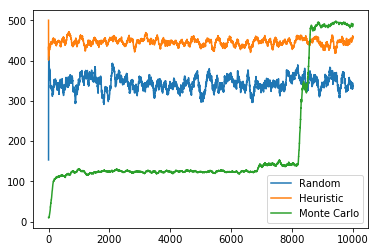

In [21]:
def monte_carlo():
    env = gym.make('CartPole-v1')
    np.random.seed(123)
    env.seed(123)
    
    agent = MCAgent()
    mc_avg_rewards = []
    scores = deque(maxlen=100)
    
    for run in range(10000):
        states, actions, rewards = run_episode(env, agent)
        # update Q table
        agent.update(states, actions, rewards)
        
        # for plot
        scores.append(np.sum(rewards))
        mc_avg_rewards.append(np.mean(scores))
        if (run%250==0):
            print("Episode:" + str(run) +" | Avg Reward: " + str(mc_avg_rewards[run]))
 
    return mc_avg_rewards

# plot
mc_avg_rewards = monte_carlo()
plt.plot(range(10000),ran_avg_rewards)
plt.plot(range(10000),heu_avg_rewards)
plt.plot(range(10000),mc_avg_rewards)
plt.legend(["Random", 'Heuristic', "Monte Carlo"])
plt.show()        

Using MC, the pole balance within 10s

##### Temporal difference (TD)

In temporal-difference (TD), we look ahead 1 step to estimate a new total reward by adding the action reward to the value function of the next state:

\begin{equation} 
V′(s_t)=r_t + 1+\gamma V(s_{t+1})
\end{equation}

<img src="images/MC.png"/>

We compute the difference of $V(s_t)$ and $V′(s_t)$. Then we add a portion of the difference back to $V(s_t)$.

\begin{equation}
\sigma = r_t+1+\gamma V(s_{t+1})−V(s_t) \\
V(s_t)=V(s_t)+\alpha \sigma
\end{equation}

After repeating many episodes, V to converge to a good estimate.

In fact, we can has n-step look ahead with n approaches infinity. n = 1, this is TD and n = $\inf$, this is Monte-Carlo.

In practial, we use a hyperparameter $\lambda$ , E.g. TD($\lambda$), to tradeoff between TD and Monte-Carlo. We ignore the class of TD($\lambda$) method.

<img src="images/MC_TD.png"/>



##### Q-Learning and SARSA algorithm

The $TD$ error of ${\cal Q}$ values is calculated by:

\begin{align}
TD = r({s_t},{a_t}) + \gamma {\cal Q}(s_{t+1},a_{t+1}) - {\cal Q}^{\pi}(s_t,a_t)
\end{align}

Action $a_{t+1}$ is chosen from the policy $\pi$. Based on the choice of $\pi$, we can classify TD error into two methods: SARSA learning and ${\cal Q}$-Learning. 

In SARSA learning (**S**tate **A**ction **R**eward **S**tate **A**ction learning), the agent always follows the **newest** policy and use this policy to update the ${\cal Q}$ values

\begin{align}
TD_{SARSA} = r({s_t},{a_t}) + \gamma {\cal Q}(s_{t+1},a_{t+1}) - {\cal Q}^{\pi}(s_t,a_t)
\end{align}

Meanwhile, in ${\cal Q}$-Learning, $a'$ is chosen to maximize the ${\cal Q}$ value. The action $a'$ can be generated from past policies.

\begin{align}
TD_{Q-Learning} = r({s_t},{a_t}) + \gamma \max \limits _{a'} {\cal Q}^{\pi}(s_{t+1},a') - {\cal Q}^\pi(s_t,a_t)
\end{align}

Now, it's time to see the difference between SARSA and Q-Learning based on Cart-pole problem.

Create class **QLearningAgent** as follows:

In [22]:
class QLearningAgent(object):
    def __init__(self):
        self.gamma = 1.0
        self.eps = 1.0
        self.alpha = 1.0

        self.Q = np.zeros((512, 2))

    def policy(self, state):
        state_idx = get_state_idx(state)

        random = np.random.rand(1)[0]
        if random > self.eps:
            action_values = self.Q[state_idx, :]
            return np.argmax(action_values)
        else:
            return np.random.randint(0, 2)

    def update_epsilon(self, t):
        # Update epsilon
        self.eps =  max(0.01, min(1.0, 1.0 - np.log((t + 1) / 100)))

    def update_alpha(self, t):
        # Update alpha
        self.alpha =  max(0.01, min(1.0, 1.0 - np.log((t + 1) / 100)))

    def update(self, state, action, next_state, reward):

        state_idx = get_state_idx(state)
        next_state_idx = get_state_idx(next_state)

        # TD Update
        maxQ = np.max(self.Q[next_state_idx, :])
        target_Q = reward + self.gamma * maxQ
        self.Q[state_idx, action] += self.alpha * (target_Q - self.Q[state_idx, action])

##### Run Q-Learning algorithm and report performance. Pseudocode as follows:

[2019-01-15 10:50:24,171] Making new env: CartPole-v1
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log


Episode:0 | Avg Reward: 33.0
Episode:250 | Avg Reward: 45.23
Episode:500 | Avg Reward: 497.05
Episode:750 | Avg Reward: 493.66
Episode:1000 | Avg Reward: 496.98
Episode:1250 | Avg Reward: 500.0
Episode:1500 | Avg Reward: 498.77
Episode:1750 | Avg Reward: 495.81
Episode:2000 | Avg Reward: 494.19
Episode:2250 | Avg Reward: 495.94
Episode:2500 | Avg Reward: 497.53
Episode:2750 | Avg Reward: 493.73
Episode:3000 | Avg Reward: 491.18
Episode:3250 | Avg Reward: 497.1
Episode:3500 | Avg Reward: 437.18
Episode:3750 | Avg Reward: 496.97
Episode:4000 | Avg Reward: 495.26
Episode:4250 | Avg Reward: 500.0
Episode:4500 | Avg Reward: 498.97
Episode:4750 | Avg Reward: 494.16
Episode:5000 | Avg Reward: 500.0
Episode:5250 | Avg Reward: 496.35
Episode:5500 | Avg Reward: 499.23
Episode:5750 | Avg Reward: 496.16
Episode:6000 | Avg Reward: 495.03
Episode:6250 | Avg Reward: 490.0
Episode:6500 | Avg Reward: 476.57
Episode:6750 | Avg Reward: 492.17
Episode:7000 | Avg Reward: 497.96
Episode:7250 | Avg Reward: 5

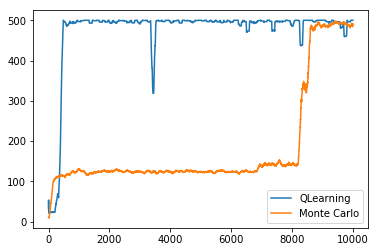

In [23]:
def q_learning():
    qlearning_avg_rewards = []
    env = gym.make('CartPole-v1')
    np.random.seed(123)
    env.seed(123)
    agent = QLearningAgent()
    scores = deque(maxlen=100)

    for epi in range(10000):
        # Run each episode
        state = env.reset()
        total_reward = 0
        for i in range(500):
            action = agent.policy(state)
            next_state, reward, done, info = env.step(action)
            # update
            agent.update(state, action, next_state, reward)

            state = next_state
            total_reward += 1
            if done:
                break

        # for plot
        scores.append(total_reward)
        qlearning_avg_rewards.append(np.mean(scores))

        if (epi%250==0):
            print("Episode:" + str(epi) +" | Avg Reward: " + str(qlearning_avg_rewards[epi]))

        agent.update_epsilon(epi)
        agent.update_alpha(epi)

    return qlearning_avg_rewards
    
# plot
qlearning_avg_rewards = q_learning()
plt.plot(range(10000),qlearning_avg_rewards)
plt.plot(range(10000),mc_avg_rewards)
plt.legend(['QLearning', "Monte Carlo"])
plt.show() 

##### SARSA algorithm

In [24]:
class SARSAAgent(object):
    def __init__(self):
        self.gamma = 1.0
        self.eps = 1.0
        self.alpha = 1.0

        self.Q = np.zeros((512, 2))

    def policy(self, state):
        state_idx = get_state_idx(state)

        random = np.random.rand(1)[0]
        if random > self.eps:
            action_values = self.Q[state_idx, :]
            return np.argmax(action_values)
        else:
            return np.random.randint(0, 2)

    def update_epsilon(self, t):
        # Update epsilon
        self.eps =  max(0.01, min(1.0, 1.0 - np.log((t + 1) / 100)))

    def update_alpha(self, t):
        # Update alpha
        self.alpha = 0.075
        # self.alpha =  max(0.05, min(1.0, 1.0 - np.log((t + 1) / 100)))

    def update(self, state, action, next_state, reward):

        state_idx = get_state_idx(state)
        next_state_idx = get_state_idx(next_state)

        # TD Update
        next_action = self.policy(next_state)
        target_Q = reward + self.gamma * self.Q[next_state_idx, next_action]
        self.Q[state_idx, action] += self.alpha * (target_Q - self.Q[state_idx, action])


[2019-01-15 10:57:29,462] Making new env: CartPole-v1
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


Episode:0 | Avg Reward: 21.0
Episode:1000 | Avg Reward: 95.27
Episode:2000 | Avg Reward: 183.75
Episode:3000 | Avg Reward: 478.46
Episode:4000 | Avg Reward: 473.09
Episode:5000 | Avg Reward: 493.62
Episode:6000 | Avg Reward: 450.53
Episode:7000 | Avg Reward: 486.52
Episode:8000 | Avg Reward: 454.54
Episode:9000 | Avg Reward: 500.0


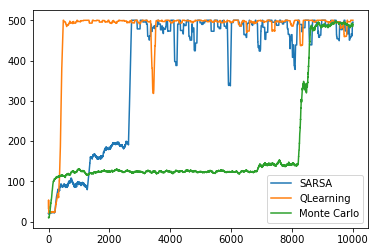

In [25]:
def sarsa():
    sarsa_avg_rewards = []
    env = gym.make('CartPole-v1')
    np.random.seed(123)
    env.seed(123)
    agent = SARSAAgent()
    scores = deque(maxlen=100)

    for epi in range(10000):
        # Run each episode
        state = env.reset()
        total_reward = 0
        for i in range(500):
            action = agent.policy(state)
            next_state, reward, done, info = env.step(action)
            # update
            agent.update(state, action, next_state, reward)

            state = next_state
            total_reward += 1
            if done:
                break

        # for plot
        scores.append(total_reward)
        sarsa_avg_rewards.append(np.mean(scores))
        
        if (epi%1000==0):
            print("Episode:" + str(epi) +" | Avg Reward: " + str(sarsa_avg_rewards[epi]))
            
        agent.update_epsilon(epi)
        agent.update_alpha(epi)

    return sarsa_avg_rewards

# plot
sarsa_avg_rewards = sarsa()
plt.plot(range(10000),sarsa_avg_rewards)
plt.plot(range(10000),qlearning_avg_rewards)
plt.plot(range(10000),mc_avg_rewards)
plt.legend(["SARSA",'QLearning', "Monte Carlo"])
plt.show()

##### Summary on Value-based Approach

- Dynamic programming for *known* model (MDP)
- Monte-Carlo and Temporal Difference for *unknown model*

### Policy-based Approach

##### Finite Difference Policy Gradient

In [26]:
class SigmoidAgent:

    def __init__(self):
        self.thetas = np.random.rand(4) * 2 - 1

    def sigmoid(self, state):
        z = state.dot(self.thetas)
        return 1 / (1 + np.exp(-z))

    def policy(self, state):
        probs = self.sigmoid(state)
        return np.random.binomial(n=1, p=probs, size=1)[0]

In [27]:
def findTheBestLearningRateUsingLineSearch(grads, env, agent):
    best_alpha = 0.0
    best_value = -1000000000000
    numEval = 40
    backup_params = np.copy(agent.thetas)
    for grid in range(numEval):
        alpha_new = 0.01 * (((1.1)**(grid-1))-1) + 0.0000001;

        theta_new = backup_params + alpha_new * grads;
        agent.thetas = theta_new

        states, actions, rewards = run_episode(env, agent)
        if (np.sum(rewards) > best_value):
            best_value = np.sum(rewards);
            best_alpha = alpha_new;

    agent.thetas = backup_params
    return best_alpha

[2019-01-15 11:10:14,046] Making new env: CartPole-v1
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


Episode:0 | Avg Reward: 36.0
Episode:1000 | Avg Reward: 10.74
Episode:2000 | Avg Reward: 500.0
Episode:3000 | Avg Reward: 183.57
Episode:4000 | Avg Reward: 10.21


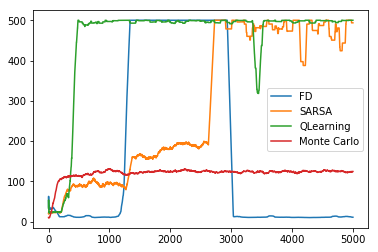

In [31]:
def fd():
    env = gym.make('CartPole-v1')
    np.random.seed(123)
    env.seed(123)
    agent = SigmoidAgent()

    # hyper parameters
    learning_rate = 0.000000004
    eps = 1e-7

    fd_avg_rewards = []
    scores = deque(maxlen=100)

    grads = np.asarray(agent.thetas)
    for epi in range(5000):
        # For each parameter of policy
        # Evaluate Ws
        _,_,rewards = run_episode(env, agent)
        J = np.sum(rewards)

        cur_params = np.copy(agent.thetas)
        for i in range(agent.thetas.shape[0]):
            agent.thetas[i] = agent.thetas[i] + eps
            _,_,rewards = run_episode(env, agent)
            Jplus = np.sum(rewards)

            grads[i] = (Jplus - J) / eps

        agent.thetas = cur_params
        # Weight update
#         learning_rate = findTheBestLearningRateUsingLineSearch(grads, env, agent)
        agent.thetas += learning_rate * grads

        # for plot
        scores.append(J)
        fd_avg_rewards.append(np.mean(scores))
        if (epi%1000==0):
            print("Episode:" + str(epi) +" | Avg Reward: " + str(fd_avg_rewards[epi]))
    
    return fd_avg_rewards

# plot
fd_avg_rewards = fd()
plt.plot(range(5000),fd_avg_rewards[0:5000])
plt.plot(range(5000),sarsa_avg_rewards[0:5000])
plt.plot(range(5000),qlearning_avg_rewards[0:5000])
plt.plot(range(5000),mc_avg_rewards[0:5000])
plt.legend(["FD","SARSA",'QLearning', "Monte Carlo"])
plt.show()

##### REINFORCE (Monte-Carlo policy gradient)

[2019-01-15 11:13:20,782] Making new env: CartPole-v1


Episode:0 | Avg Reward: 36.0
Episode:1000 | Avg Reward: 344.71
Episode:2000 | Avg Reward: 313.05
Episode:3000 | Avg Reward: 360.86
Episode:4000 | Avg Reward: 500.0


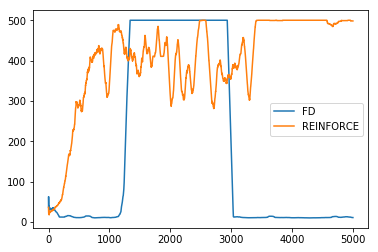

In [33]:
def reinforce():
    env = gym.make('CartPole-v1')
    np.random.seed(123)
    env.seed(123)
    agent = SigmoidAgent()

    # hyper parameters
    learning_rate = 0.001
    gamma = 0.99

    reinforce_avg_rewards = []
    scores = deque(maxlen=100)

    for e in range(5000):

        states, actions, rewards = run_episode(env, agent)
        discounted_reward = get_discounted_rewards(rewards, gamma)

        probs = agent.sigmoid(states)
        grads = discounted_reward * \
                (-(1. - actions) *
                 probs + (actions * (1. - probs) )) * \
                states.T

        agent.thetas += learning_rate * np.sum(grads, axis=1)

        # Append for logging and print
        scores.append(np.sum(rewards))
        reinforce_avg_rewards.append(np.mean(scores))
        if (e%1000==0):
            print("Episode:" + str(e) +" | Avg Reward: " + str(reinforce_avg_rewards[e]))
            
    return reinforce_avg_rewards

# plot
reinforce_avg_rewards = reinforce()
plt.plot(range(5000),fd_avg_rewards)
plt.plot(range(5000),reinforce_avg_rewards)
plt.legend(["FD",'REINFORCE'])
plt.show()

##### Natural Policy Gradient

[2019-01-15 11:15:01,627] Making new env: CartPole-v1


Episode:0 | Avg Reward: 36.0
Episode:250 | Avg Reward: 459.15
Episode:500 | Avg Reward: 488.35
Episode:750 | Avg Reward: 383.0
Episode:1000 | Avg Reward: 460.47
Episode:1250 | Avg Reward: 406.01
Episode:1500 | Avg Reward: 461.47
Episode:1750 | Avg Reward: 450.06


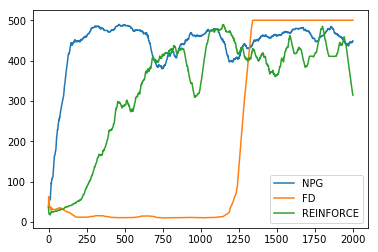

In [34]:
def npg():
    env = gym.make('CartPole-v1')
    np.random.seed(123)
    env.seed(123)
    agent = SigmoidAgent()

    # hyper parameters
    gamma = 0.99

    npg_avg_rewards = []
    scores = deque(maxlen=100)

    for e in range(2000):

        states, actions, rewards = run_episode(env, agent)
        discounted_reward = get_discounted_rewards(rewards, gamma)

        probs = agent.sigmoid(states)
        dLogPi = (-(1. - actions) * probs + (actions * (1. - probs) )) * states.T
        sumDLogPi = np.sum(dLogPi, axis=1)
        F = np.dot(sumDLogPi.reshape(-1,1), sumDLogPi.reshape(1,-1))

        vanilla_grads = sumDLogPi * discounted_reward[0]
        natural_grads = np.dot(np.linalg.pinv(F),vanilla_grads)

        learning_rate = findTheBestLearningRateUsingLineSearch(natural_grads, env, agent)
        agent.thetas += learning_rate * natural_grads

        # Append for logging and print
        scores.append(np.sum(rewards))
        npg_avg_rewards.append(np.mean(scores))
        if (e%250==0):
            print("Episode:" + str(e) +" | Avg Reward: " + str(npg_avg_rewards[e]))

    return npg_avg_rewards

# plot
npg_avg_rewards = npg()
plt.plot(range(2000),npg_avg_rewards[0:2000])
plt.plot(range(2000),fd_avg_rewards[0:2000])
plt.plot(range(2000),reinforce_avg_rewards[0:2000])
plt.legend(["NPG","FD",'REINFORCE'])
plt.show()

### Actor Critic Approach

Using A, Q, V insteads of R to reduce the variance

In [35]:
class ACAgent:

    def __init__(self):
        # actor params
        self.thetas = np.random.rand(4) * 2 - 1
        # critic params
        self.Ws = np.random.rand(4) * 2 - 1

    def sigmoid(self, state):
        z = state.dot(self.theta)
        return 1 / (1 + np.exp(-z))

    def policy(self, state):
        probs = self.sigmoid(state)
        return np.random.binomial(n=1, p=probs, size=1)[0]

    def get_dW(self, rewards, states, gamma):
        approximated_V = self.get_V(states)
        approximated_Q = get_discounted_rewards(rewards, gamma)
        grads = ((approximated_Q - approximated_V) * states.T).sum(axis=1)

        return grads

    def get_dAlpha(self, states, actions, adv):
        probs = self.sigmoid(states)
        grads = adv * \
                (-(1. - actions) *
                 probs + (actions * (1. - probs))) * \
                states.T

        return grads

    def get_V(self, state):
        return np.dot(state, self.W)

[2019-01-15 11:27:09,372] Making new env: CartPole-v1


Episode:0 | Avg Reward: 52.0
Episode:250 | Avg Reward: 63.07
Episode:500 | Avg Reward: 214.13
Episode:750 | Avg Reward: 287.81
Episode:1000 | Avg Reward: 359.52
Episode:1250 | Avg Reward: 259.68
Episode:1500 | Avg Reward: 382.44
Episode:1750 | Avg Reward: 190.16
Episode:2000 | Avg Reward: 460.67
Episode:2250 | Avg Reward: 467.12
Episode:2500 | Avg Reward: 397.27
Episode:2750 | Avg Reward: 308.62
Episode:3000 | Avg Reward: 348.83
Episode:3250 | Avg Reward: 500.0
Episode:3500 | Avg Reward: 486.42
Episode:3750 | Avg Reward: 498.21


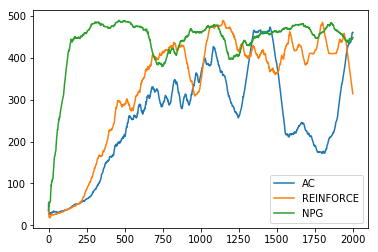

In [36]:
def actor_critic():
    env = gym.make('CartPole-v1')
    np.random.seed(123)
    env.seed(123)
    agent = ACAgent()

    # hyper parameters
    actor_learning_rate = 0.001
    critic_learning_rate = 1.e-5
    gamma = 0.99

    ac_avg_rewards = []
    scores = deque(maxlen=100)

    for e in range(4000):

        states, actions, rewards = run_episode(env, agent)

        # Critic update
        dW = agent.get_dW(rewards, states, gamma)
        agent.Ws += critic_learning_rate * dW

        # Actor update
        adv = get_discounted_rewards(rewards, gamma) - agent.get_V(states)
        dTheta = agent.get_dAlpha(states, actions, adv)

        agent.thetas += actor_learning_rate * np.sum(dTheta, axis=1)

        # Append for logging and print
        scores.append(np.sum(rewards))
        ac_avg_rewards.append(np.mean(scores))
        if (e%250==0):
            print("Episode:" + str(e) +" | Avg Reward: " + str(ac_avg_rewards[e]))
    
    return ac_avg_rewards

# plot
ac_avg_rewards = actor_critic()
plt.plot(range(2000),ac_avg_rewards[0:2000])
plt.plot(range(2000),reinforce_avg_rewards[0:2000])
plt.plot(range(2000),npg_avg_rewards[0:2000])
plt.legend(["AC",'REINFORCE',"NPG"])
plt.show()

# Deep Reinforcement Learning?

### From Q-Learning to DQN

In [37]:
import tensorflow as tf
from tensorflow import keras

ImportError: cannot import name keras

In [33]:
class DQNAgent:
    def __init__(self, state_size, action_size):

        # get size of state and action
        self.state_size = state_size
        self.action_size = action_size

        # Hyperparameters
        self.discount_factor = 0.99
        self.learning_rate = 0.001
        self.eps = 1.0
        self.eps_decay = 0.999
        self.eps_min = 0.01
        self.batch_size = 64
        self.train_start = 1000

        # create replay memory using deque
        self.memory = deque(maxlen=2000)

        # create main model and target model
        self.model = self.build_model()
        self.target_model = self.build_model()

        # initialize target model
        self.update_target_model()

    # approximate Q function using Neural Network
    def build_model(self):

        model = keras.models.Sequential()
        model.add(keras.layers.Dense(units=5,
                                     input_dim=self.state_size,
                                     activation='relu'))
        model.add(keras.layers.Dense(units=5,
                                     activation='relu'))
        model.add(keras.layers.Dense(self.action_size,
                                     activation='linear'))
        model.compile(loss='mse',
                      optimizer=keras.optimizers.Adam(lr=self.learning_rate))
        return model

    # after some time interval update the target model to be same with model
    def update_target_model(self):
        self.target_model.set_weights(self.model.get_weights())

    # get action from model using epsilon-greedy policy
    def policy(self, state):
        if np.random.rand() <= self.eps:
            return np.random.randint(0, self.action_size)
        else:
            q_value = self.model.predict(state)
            return np.argmax(q_value[0])

    # save sample <s,a,r,s',done> to the replay memory
    def append_sample(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
        if self.eps > self.eps_min:
            self.eps *= self.eps_decay

    # pick samples randomly from replay memory (with batch_size)
    def train_model(self):
        if len(self.memory) < self.train_start:
            return

        batch_size = min(self.batch_size, len(self.memory))
        mini_batch = random.sample(self.memory, batch_size)

        update_input = np.zeros((batch_size, self.state_size))
        update_target = np.zeros((batch_size, self.state_size))
        action, reward, done = [], [], []

        for i in range(self.batch_size):
            update_input[i] = mini_batch[i][0]
            action.append(mini_batch[i][1])
            reward.append(mini_batch[i][2])
            update_target[i] = mini_batch[i][3]
            done.append(mini_batch[i][4])

        target = self.model.predict(update_input)
        target_val = self.target_model.predict(update_target)

        for i in range(self.batch_size):
            # Q Learning: get maximum Q value at s' from target model
            if done[i]:
                target[i][action[i]] = reward[i]
            else:
                target[i][action[i]] = reward[i] + self.discount_factor * (
                    np.amax(target_val[i]))

        # and do the model fit!
        self.model.fit(update_input, target,
                       batch_size=self.batch_size,
                       epochs=1,
                       verbose=0)

Episode:0 | Avg Reward: 33.0
Episode:250 | Avg Reward: 48.01
Episode:500 | Avg Reward: 177.22
Episode:750 | Avg Reward: 253.5
Episode:1000 | Avg Reward: 349.01
Episode:1250 | Avg Reward: 184.35
Episode:1500 | Avg Reward: 225.26
Episode:1750 | Avg Reward: 239.24


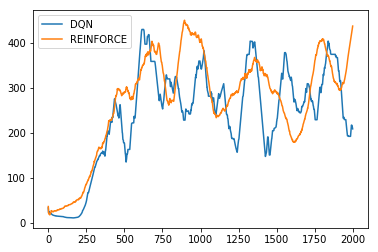

In [42]:
def dqn():
    env = gym.make('CartPole-v1')
    np.random.seed(123)
    env.seed(123)
    random.seed(123)
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    agent = DQNAgent(state_size, action_size)

    dqn_avg_rewards = []
    scores = deque(maxlen=100)

    for e in range(2000):
        done = False
        score = 0
        state = env.reset()
        state = np.reshape(state, [1, state_size])
        while not done:
            # get action for the current state and go one step in environment
            action = agent.policy(state)
            next_state, reward, done, info = env.step(action)
            next_state = np.reshape(next_state, [1, state_size])

            # save the sample <s, a, r, s', done> to the replay memory
            agent.append_sample(state, action, reward, next_state, done)
            # every time step do the training
            agent.train_model()

            score += reward
            state = next_state

            if done:
                # every episode update the target model to be same with model
                agent.update_target_model()

                scores.append(score)
                dqn_avg_rewards.append(np.mean(scores))
                if (e%250==0):
                    print("Episode:" + str(e) +" | Avg Reward: " + str(dqn_avg_rewards[e]))
    
    return dqn_avg_rewards
                    
# plot
dqn_avg_rewards = dqn()
plt.plot(range(2000),dqn_avg_rewards[0:2000])
plt.plot(range(2000),reinforce_avg_rewards[0:2000])
plt.legend(["DQN",'REINFORCE'])
plt.show()

### From Policy Gradient to Deep Policy Gradient

In [44]:
class DPGAgent:
    def __init__(self, state_size, action_size):
        # get size of state and action
        self.state_size = state_size
        self.action_size = action_size

        # These are hyper parameters
        self.discount_factor = 0.99
        self.learning_rate = 0.001

        # create model for policy network
        self.model = self.build_model()

        # lists for the states, actions and rewards
        self.states, self.actions, self.rewards = [], [], []

    # approximate policy using Neural Network
    def build_model(self):
        model = keras.models.Sequential()
        model.add(keras.layers.Dense(units=5,
                                     input_dim=self.state_size,
                                     activation='relu'))
        model.add(keras.layers.Dense(units=5,
                                     activation='relu'))
        model.add(keras.layers.Dense(self.action_size,
                                     activation='softmax'))
        model.summary()
        model.compile(loss="categorical_crossentropy",
                      optimizer=keras.optimizers.Adam(lr=self.learning_rate))
        return model

    # using the output of policy network, pick action stochastically
    def policy(self, state):
        policy = self.model.predict(state, batch_size=1).flatten()
        return np.random.choice(self.action_size, 1, p=policy)[0]

    # In Policy Gradient, Q function is not available.
    # Instead agent uses sample returns for evaluating policy
    def discount_rewards(self, rewards):
        discounted_rewards = np.zeros_like(rewards)
        running_add = 0
        for t in reversed(range(0, len(rewards))):
            running_add = running_add * self.discount_factor + rewards[t]
            discounted_rewards[t] = running_add
        return discounted_rewards

    # save <s, a ,r> of each step
    def append_sample(self, state, action, reward):
        self.states.append(state)
        self.rewards.append(reward)
        self.actions.append(action)

    # update policy network every episode
    def train_model(self):
        episode_length = len(self.states)
        discounted_rewards = self.discount_rewards(self.rewards)

        update_inputs = np.zeros((episode_length, self.state_size))
        advantages = np.zeros((episode_length, self.action_size))

        for i in range(episode_length):
            update_inputs[i] = self.states[i]
            advantages[i][self.actions[i]] = discounted_rewards[i]

        self.model.fit(update_inputs, advantages, epochs=1, verbose=0)
        self.states, self.actions, self.rewards = [], [], []


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 5)                 25        
_________________________________________________________________
dense_41 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_42 (Dense)             (None, 2)                 12        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________
Episode:0 | Avg Reward: 47.0
Episode:250 | Avg Reward: 26.86
Episode:500 | Avg Reward: 34.7
Episode:750 | Avg Reward: 37.32
Episode:1000 | Avg Reward: 50.98
Episode:1250 | Avg Reward: 77.33
Episode:1500 | Avg Reward: 106.6
Episode:1750 | Avg Reward: 158.68
Episode:2000 | Avg Reward: 212.36
Episode:2250 | Avg Reward: 234.04
Episode:2500 | Avg Reward: 380.86
Episode:2750 | Avg Reward: 470.66


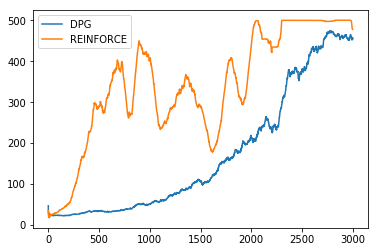

In [46]:
def dpg():
    env = gym.make('CartPole-v1')
    np.random.seed(123)
    env.seed(123)
    random.seed(123)
    tf.set_random_seed(123)
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    agent = DPGAgent(state_size, action_size)

    dpg_avg_rewards = []
    scores = deque(maxlen=100)

    for e in range(3000):
        done = False
        score = 0
        state = env.reset()
        state = np.reshape(state, [1, state_size])

        while not done:
            action = agent.policy(state)
            next_state, reward, done, info = env.step(action)
            next_state = np.reshape(next_state, [1, state_size])

            # save the sample <s, a, r> to the memory
            agent.append_sample(state, action, reward)

            score += reward
            state = next_state

            if done:
                agent.train_model()

        scores.append(score)
        dpg_avg_rewards.append(np.mean(scores))
        if (e % 250 == 0):
            print("Episode:" + str(e) + " | Avg Reward: " + str(dpg_avg_rewards[e]))

    return dpg_avg_rewards

# plot
dpg_avg_rewards = dpg()
plt.plot(range(3000),dpg_avg_rewards[0:3000])
plt.plot(range(3000),reinforce_avg_rewards[0:3000])
plt.legend(["DPG",'REINFORCE'])
plt.show()

In [49]:
# A2C(Actor-Critic)
class DACAgent:
    def __init__(self, state_size, action_size):
        # if you want to see Cartpole learning, then change to True
        self.render = False
        self.load_model = False
        # get size of state and action
        self.state_size = state_size
        self.action_size = action_size
        self.value_size = 1

        # These are hyper parameters for the Policy Gradient
        self.discount_factor = 0.99
        self.actor_lr = 0.001
        self.critic_lr = 0.005

        # create model for policy network
        self.actor = self.build_actor()
        self.critic = self.build_critic()

    # Actor network
    def build_actor(self):
        actor = keras.models.Sequential()
        actor.add(keras.layers.Dense(units=5,
                                     input_dim=self.state_size,
                                     activation='relu'))
        actor.add(keras.layers.Dense(self.action_size,
                                     activation='softmax'))
        actor.summary()
        actor.compile(loss='categorical_crossentropy',
                      optimizer=keras.optimizers.Adam(lr=self.critic_lr))
        return actor

    # Critic network
    def build_critic(self):
        critic = keras.models.Sequential()
        critic.add(keras.layers.Dense(units=5,
                                      input_dim=self.state_size,
                                      activation='relu'))
        critic.add(keras.layers.Dense(self.value_size,
                                      activation='linear'))
        critic.summary()
        critic.compile(loss="mse",
                       optimizer=keras.optimizers.Adam(lr=self.critic_lr))
        return critic

    # using the output of policy network, pick action stochastically
    def policy(self, state):
        probs = self.actor.predict(state, batch_size=1).flatten()
        return np.random.choice(self.action_size, 1, p=probs)[0]

    # update policy network every episode
    def train_model(self, state, action, reward, next_state, done):
        target = np.zeros((1, self.value_size))
        advantages = np.zeros((1, self.action_size))

        value = self.critic.predict(state)[0]
        next_value = self.critic.predict(next_state)[0]

        if done:
            advantages[0][action] = reward - value
            target[0][0] = reward
        else:
            advantages[0][action] = reward + self.discount_factor * (
                next_value - value)
            target[0][0] = reward + self.discount_factor * next_value

        self.actor.fit(state, advantages, epochs=1, verbose=0)
        self.critic.fit(state, target, epochs=1, verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 5)                 25        
_________________________________________________________________
dense_44 (Dense)             (None, 2)                 12        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 5)                 25        
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 6         
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Episode:0 | Avg Reward: 58.0
Episode:250 | Avg Reward: 55.72
Episode:500 | Avg Rewar

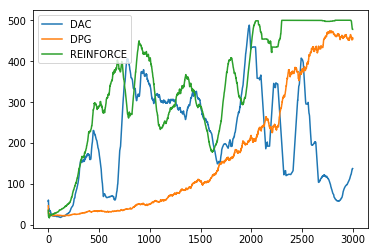

In [48]:
def dac():
    env = gym.make('CartPole-v1')
    np.random.seed(123)
    env.seed(123)
    random.seed(123)
    tf.set_random_seed(123)
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    agent = DACAgent(state_size, action_size)

    dac_avg_rewards = []
    scores = deque(maxlen=100)

    for e in range(3000):
        done = False
        score = 0
        state = env.reset()
        state = np.reshape(state, [1, state_size])
        while not done:
            action = agent.policy(state)
            next_state, reward, done, info = env.step(action)
            next_state = np.reshape(next_state, [1, state_size])

            agent.train_model(state, action, reward, next_state, done)

            score += reward
            state = next_state

            if done:
                break

        scores.append(score)
        dac_avg_rewards.append(np.mean(scores))
        if (e % 250 == 0):
            print("Episode:" + str(e) + " | Avg Reward: " + str(dac_avg_rewards[e]))

    return dac_avg_rewards

# plot
dac_avg_rewards = dac()
plt.plot(range(3000),dac_avg_rewards[0:3000])
plt.plot(range(3000),dpg_avg_rewards[0:3000])
plt.plot(range(3000),reinforce_avg_rewards[0:3000])
plt.legend(["DAC", "DPG",'REINFORCE'])
plt.show()

### Other algorithms

### DDPG, A3C, A2C, TRPO, PPO inherits the theories that I have shown above.

##### Actor Critic architecture
##### Policy Gradient
##### Deep Learning model

# Research Areas?

### Auto Machine Learning (AutoML)

### Hierarchial Reinforcement Learning

### Planning under Partial Observability

### Meta learning

# Conclusion?

Depend on the specified problem, we can pick up the appropriate RL algorithm (not nessesary deep algorithms).

### The process to solve the problem with RL algorithms:

1. Determine the input and output values of the problem

2. Build random, heuristic algorithms (baseline)

3. Build RL algorithms: build deep network, write algorithm

4. Running the algorithms and tuning hyperparameters (using AutoML)

4. Improve algorithms by: normalizing input, adding more inputs, prevent overfiting (adding regularizer, dropout,...)

# References

1. RL course of David Silver: http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching.html